In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df_master = pd.read_csv('../Data/master_data.csv')
#drop the index column
df_master = df_master.drop(columns=['index'])

#drop the rows with missing values
df_master = df_master.dropna()

#create a dataframe for each bus line
df_67 = df_master[df_master['line'] == 67].drop(columns=['line'])
df_80 = df_master[df_master['line'] == 80].drop(columns=['line'])
df_100 = df_master[df_master['line'] == 100].drop(columns=['line'])
df_121 = df_master[df_master['line'] == 121].drop(columns=['line'])
df_139 = df_master[df_master['line'] == 139].drop(columns=['line'])
df_439 = df_master[df_master['line'] == 439].drop(columns=['line'])
df_467 = df_master[df_master['line'] == 467].drop(columns=['line'])
df_480 = df_master[df_master['line'] == 480].drop(columns=['line'])


In [6]:
df_67.head()

,day_of_week,delay_start,start_time,temp_start,rain_amt,snow_amt,delay_end
0,1.0,0.0,17,15.1,0.0,0.0,3.0
1,1.0,0.0,41,15.1,0.0,0.0,10.0
2,1.0,-1.0,70,13.7,0.0,0.0,-6.0
3,1.0,-1.0,309,11.8,0.0,0.0,12.0
4,1.0,0.0,337,11.8,0.0,0.0,7.0


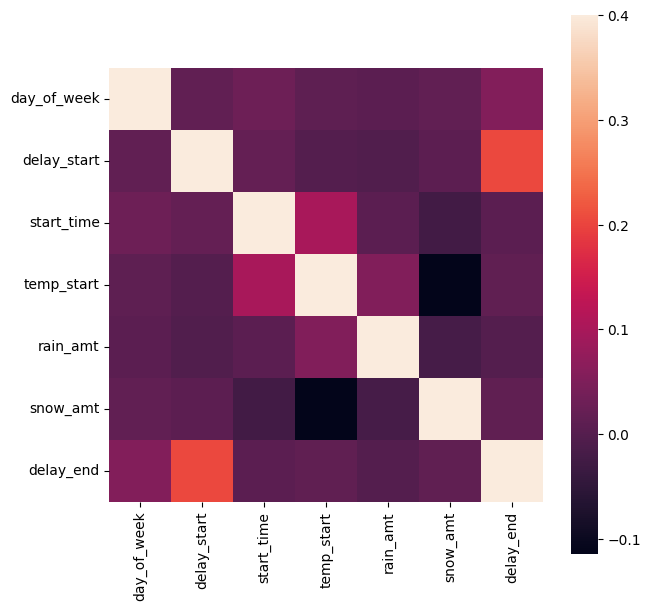

In [7]:
Corr_mat = df_67.corr()
fig = plt.figure(figsize = (7,7))

sb.heatmap(Corr_mat, vmax = .4, square = True)
plt.show()

In [8]:
predictors = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'snow_amt']
outcome = 'delay_end'

In [9]:
for i in range(len(predictors)):
    for j in range(len(predictors)):
        if i<j:
            corr, _ = pearsonr(df_67[predictors[i]], df_67[predictors[j]])
            print('The correlation between', predictors[i], 'and', predictors[j], 'is', corr)

The correlation between delay_start and start_time is 0.018529247367188605
The correlation between delay_start and temp_start is 0.00010710822647627498
The correlation between delay_start and rain_amt is -0.004355378938440594
The correlation between delay_start and snow_amt is 0.008839144084998942
The correlation between start_time and temp_start is 0.09869371702103792
The correlation between start_time and rain_amt is 0.00715565401454778
The correlation between start_time and snow_amt is -0.023981662723660747
The correlation between temp_start and rain_amt is 0.052807173190459106
The correlation between temp_start and snow_amt is -0.11426589520488949
The correlation between rain_amt and snow_amt is -0.01854141620463124


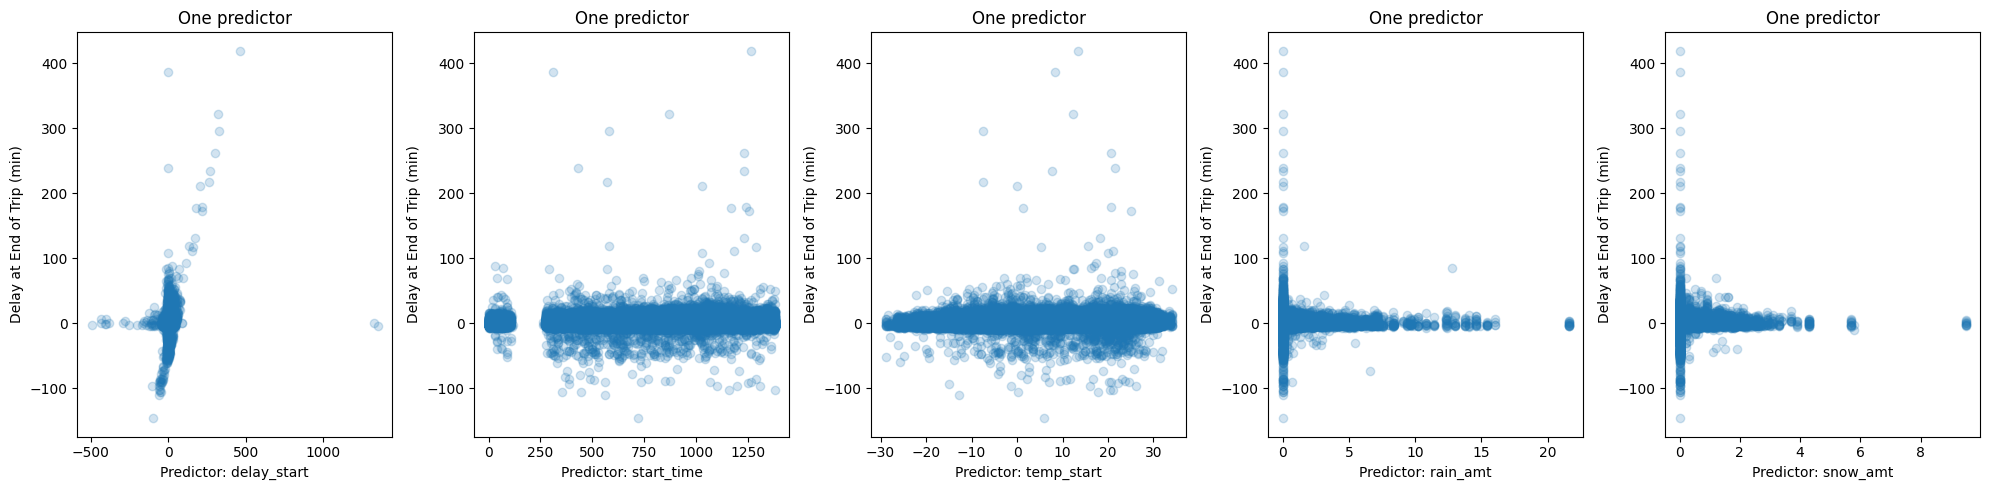

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i, axi in enumerate(ax.flat):
    axi.scatter(df_67[predictors[i]], df_67[outcome], color='tab:blue', alpha=0.2)
    axi.set_ylabel('Delay at End of Trip (min)')
    axi.set_xlabel(f'Predictor: {predictors[i]}')
    axi.set_title("One predictor");

plt.tight_layout()
plt.show()